In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
class NeuralNetwork:
    def __init__ (self,layers):
        self.layers=layers
        self.L=len(layers)
        self.number_feature=layers[0]
        self.number_class=layers[1]
        self.w={}
        self.b={}
        self.dw={}
        self.db={}
        self.setup()
    def setup(self):
        for i in range(1,self.L):
            self.w[i]=tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1])))
            self.b[i]=tf.Variable(tf.random.normal(shape=(sel.layers[i],1)))
            
   

In [3]:
class NeuralNetwork(NeuralNetwork):
    def forwardPass(self,A):
        A=tf.convert_to_tensor(A,dtype=32)
        for i in range(1, self.L):
            Z= tf.matmul(A, tf.transpose(self.w[i])) + tf.transpose(self.b[i])
            if i!= self.L-1:
                A=tf.nn.relu(Z)
            else:
                A=Z
        return A

In [4]:
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A))
    def upgrade_parameters(self,lr):
        for j in range(1, self.L):
            self.w[j].assign_sub(lr*self.dw[j])
            self.b[j].assign_sub(lr*self.db[j])

In [5]:
class NeuralNetwork(NeuralNetwork):
    def predict(self,x):
        A= self.forwardpass(x)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    def info(self):
        num_params=0
        for i in range(1, self.L):
            num_params+=self.w[i].shape[0]*self.w[i].shape[1]
            num_params+=self.b[i].shape[0]
        print("Number of Feature: {}".format(self.number_feature))
        print("Number of Class: {}".format(self.number_class))
        
        print("Hidden Layer Information is : ")
        for j in range(1, self.L-1):
            print("Layer: {}, units {}".format(i,self.layers[j]))
        
        print("Total Number of Parameters : {}".format(num_params))
            
            
    

In [6]:
class NeuralNetwork(NeuralNetwork):
    def training_on_batch(self,x,y,lr):
        x= tf.convert_to_tensor(x, dtype=tf.float32)
        y= tf.convert_to_tensor(y, dtype=tf.float32)
        
        with tf.GradientTape(persistent= True) as tape:
            A= self.forwardPass(x)
            loss=self.compute_loss(A,y)
            
            for key in self.w.keys():
                self.dw[key]= tape.gradient(loss,self.w[key])
                self.db[key]= tape.gradient(loss,self.b[key])
                
            del tape
            
            self.upgrade_parameters(lr)
            
            return loss.numpy()
                
                

In [7]:
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, x_test, y_train, y_test,epochs, step_per_epochs, batch_size, lr):
        history={"val_loss":[],
                 "train_loss":[],
                 "val_acc":[]}
        
        
        for e in range(0, epochs):
            training_loss_epochs=0.0
            print("Epochs{}".format(e), end=" | ")
            for i in range(step_per_epochs):
                x_batch= x_train[i*batch_size:(i+1)*batch_size]
                y_batch= y_train[i*batch_size:(i+1)*batch_size]
                batch_loss= self.training_on_batch(x_batch,y_batch,lr)
                epochs_loss_train +=batch_loss
                
                
                if i %int(step_per_epochs/10) == 0:
                    print(end=" . ")
                    
            history['train_loss'].append(epochs_loss_train/step_per_epochs)
            
            valA= self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test,valA).numpy())
            
            valuPr=self.predict(x_test)
            
            history['val_acc'].append(np.mean(np.argmax(y_test,axis=1) == valuPr.numpy()))
            print("Value Accuracy:", history['val_acc'][-1])
        
        
        return history  
            
                
                
                 

In [34]:

def loadDatasets():
    (x_train,y_train), (x_test,y_test)= tf.keras.datasets.mnist.load_data()
    x_train=np.reshape(x_train,(x_train.shape[0], 784))/255.0
    y_train=tf.keras.utils.to_categorical(y_train)
    x_test= np.reshape(x_test,(x_test.shape[0], 784))//255.0
    y_test= tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y Test Data {}".format(y_test))
    print("Len of Y test Datasets: {}".format(len(y_test[0])))
    #print("Unique Value is : {}".format(np.unique(y_test[0])))
    print("Unique Value is : {}".format(np.argmax(y_test[1])))
    
    return (x_train, y_train),(x_test,y_test)


def plot_random_sample(x,y,p=None):
    indicies= np.random.choice(range(0, x.shape[0]), 10)
    y= np.argmax(y, axis=1)
    
    if p is None:
        p = y
    
    plt.figure(figsize=(5, 4))
    for i,index in enumerate(indicies):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks= ([])
        plt.yticks([])
        plt.gray()
        
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color = col)
        
    return plt
        
    


In [32]:

(x_train, y_train), (x_test, y_test)= loadDatasets()

X Train Datasets Shape: (60000, 784)
Y Test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y test Datasets: 10
Unique Value is : 2


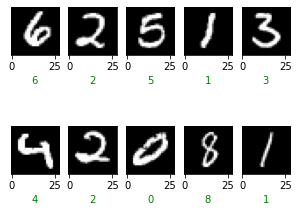

In [35]:
plot_random_sample(x_train, y_train).show()